In [25]:
%matplotlib inline

# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
from pathlib import Path
import plotly.express as px

In [26]:
# Load the war_conflicts dataset includng current 2022 data

file_path = "./resources/conflicts_wars.csv"
war_df = pd.read_csv(file_path,index_col=0)
war_df.head()

,Headline,Conflict,Country,Region,Description,Sources
Date,,,,,,
3000 BC,God Punishes Man with Six-Day Storm,Weapon,Unknown,Western Asia,Ancient Sumerian legend recounts the deeds of ...,Hatami and Gleick 1994
2500 BC,Lagash-Umma border dispute,Weapon,Mesopotamia,Western Asia,The dispute over the Gu'edena (edge of paradis...,Hatami and Gleick 1994
1720-1684 BC,Tigris River dammed,Weapon,Mesopotamia,Western Asia,"A grandson of Hammurabi, Abish or Abi-Eshuh, d...",Hatami and Gleick 1994
circa 1300 BC,Kishon River flooded in defeat of Sisera,Weapon,Unknown,Western Asia,The Old Testament gives an account of the defe...,Scofield 1967
1200 BC,Moses parts the Red Sea,Weapon,Egypt,Northern Africa,When Moses and the retreating Jews find themse...,Hatami and Gleick 1994


In [27]:
len(war_df)

926

In [28]:
war_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 926 entries, 3000 BC to 2022
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headline     926 non-null    object
 1   Conflict     926 non-null    object
 2   Country      926 non-null    object
 3   Region       926 non-null    object
 4   Description  926 non-null    object
 5   Sources      926 non-null    object
dtypes: object(6)
memory usage: 50.6+ KB


In [29]:
import seaborn as sns

C:\anaconda\envs\PythonData\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


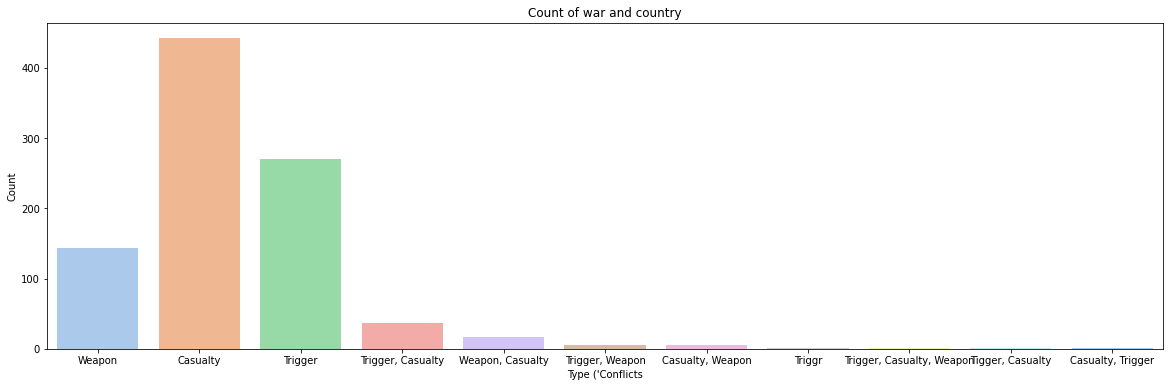

In [35]:
plt.figure(figsize=(20,6))
g = sns.countplot(war_df.Conflict, palette="pastel");
plt.title("Count of war and country")
plt.xlabel("Type ('Conflicts")
plt.ylabel("Count")
plt.show()